<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/Linear_Regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
df=pd.read_csv("/content/computers.csv")

In [ ]:
df.head

<bound method NDFrame.head of     Units  Minutes
0       1       23
1       2       29
2       3       49
3       4       64
4       4       74
5       5       87
6       6       96
7       6       97
8       7      109
9       8      119
10      9      149
11      9      145
12     10      154
13     10      166>

In [4]:
mv=df['Minutes'].mean()

Text(1, 99.71428571428571, 'Average repair time')

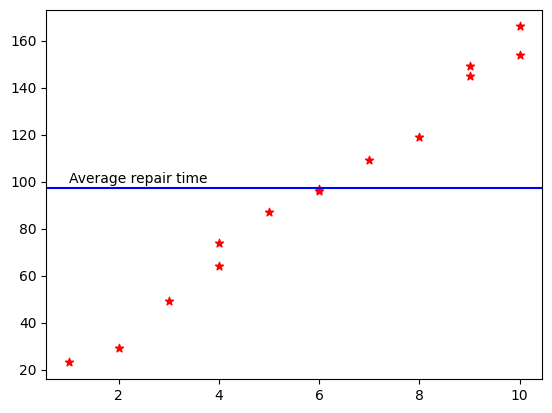

In [5]:
plt.scatter(df['Units'],df['Minutes'],color='red',marker='*')
plt.axhline(y=mv,color='blue')
plt.annotate("Average repair time",xy=(1,mv+2.5))

In [6]:
minutes_model1=df['Minutes'].mean()
minutes_model2=10+12*df['Units']
minutes_model3=6+18*df['Units']
print(minutes_model1)
print(minutes_model2)
print(minutes_model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [7]:
df['minute_model1'] = minutes_model1
df['minute_model2'] = minutes_model2
df['minute_model3'] = minutes_model3

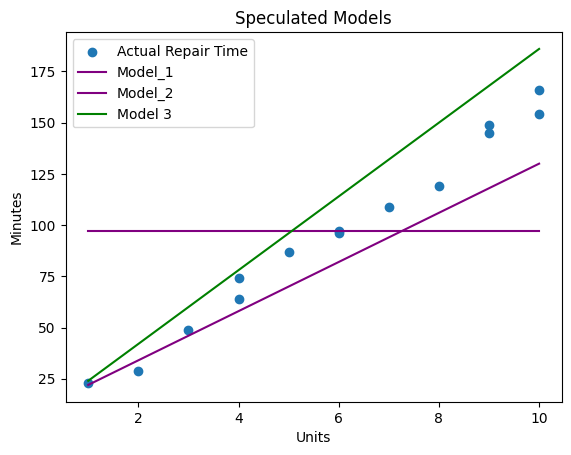

In [8]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=df,label='Actual Repair Time')
ax.plot(df['Units'],df['minute_model1'],color='purple', label='Model_1')
ax.plot(df['Units'],df['minute_model2'],color='purple',label='Model_2')
ax.plot(df['Units'],df['minute_model3'],color='green',label='Model 3')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()

In [9]:
model1_obs=pd.DataFrame({'Units':df['Units'],
                         'Actual Time':df['Minutes'],
                         'Predicted Time':df['minute_model1'],
                         'Error':(df.minute_model1 - df.Minutes)
                         })
model1_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [10]:
sum(model1_obs ['Error']**2)

27768.357142857145

In [11]:
model2_obs=pd.DataFrame({'Units':df['Units'],
                         'Actual Time':df['Minutes'],
                         'Predicted Time':df['minute_model2'],
                         'Error':(df.minute_model2 - df.Minutes)
                         })
model2_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [12]:
x = df.Units
y = df.Minutes

xy=x*y
n=len(df)

xmean=df.Units.mean()
ymean=df.Minutes.mean()

numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)

m=numerator/denominator
c=ymean - (m*xmean)
print('intercept-c:',c,'coefficient-m:',m)

intercept-c: 4.161654135338296 coefficient-m: 15.508771929824569


In [13]:
min_best_model = c+m*df.Units
df['min_best_model']=min_best_model
df[['Units','Minutes','min_best_model']]

,Units,Minutes,min_best_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best Fit Model line')

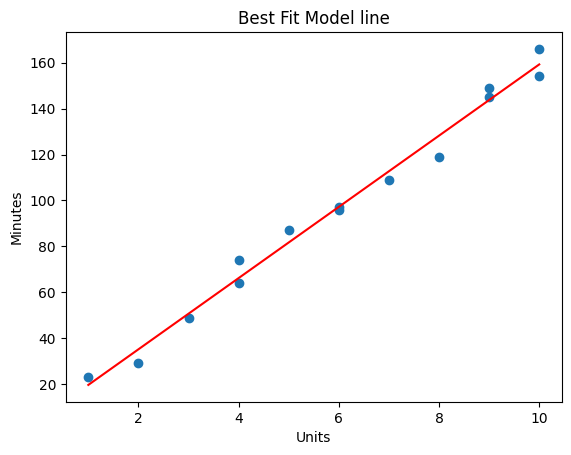

In [21]:
fig,ax = plt.subplots()

ax.scatter(x='Units',y = 'Minutes', data=df)
ax.plot(df.Units,df.min_best_model,color='red')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Best Fit Model line')



In [24]:
best_fit_model_obs = pd.DataFrame({
    'Units':df['Units'],
    'Actual Time':df.Minutes,
    'Predicted Time': df.min_best_model,
    'Error':(df.min_best_model - df.Minutes)
})
best_fit_model_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [25]:
sum(best_fit_model_obs.Error**2)


348.848370927318

In [26]:
X = df[['Units']]
y = df['Minutes']

In [29]:
model = LinearRegression()


In [30]:
model.fit(X,y)


LinearRegression()

In [31]:
print("Intercepts: ", model.intercept_)
print("Coefficients: ", model.coef_)


Intercepts:  4.161654135338296
Coefficients:  [15.50877193]


In [32]:
SST = sum((df.Minutes - df.Minutes.mean())**2)
SST

27768.357142857145

In [33]:
SSE = sum(best_fit_model_obs.Error**2)
SSE


348.848370927318

In [34]:
SSR = SST - SSE


In [35]:
Rsq = SSR/SST
Rsq


0.9874371980620736

In [37]:
Rsql = model.score(df[['Units']],y)
Rsql

0.9874371980620736